# KMeans clustering

- KMeans is a clustering algorithm that aims to partition n observations into k clusters.

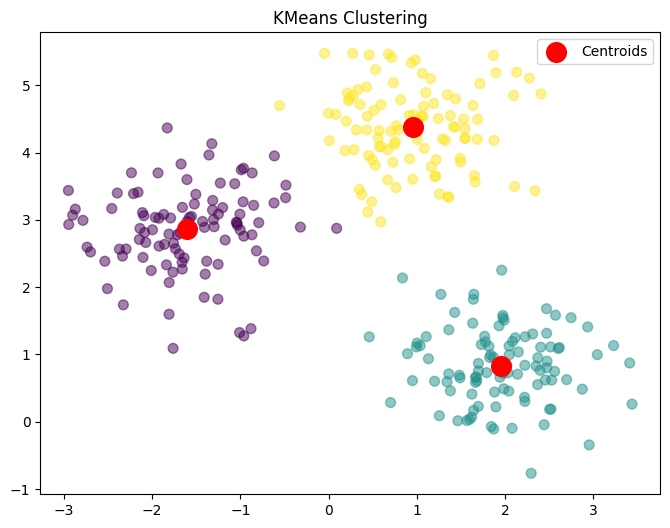

array([2, 1, 2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 2, 2, 0, 1, 0, 2,
       1, 2, 0, 0, 2, 0, 1, 1, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 0,
       2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 0, 2, 1, 2, 2, 2, 1, 0,
       2, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1,
       2, 0, 2, 2, 0, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       2, 0, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1,
       0, 0, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 1,
       2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 0,
       2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0, 1,
       2, 1, 1, 1, 2, 0, 0, 2, 2, 0, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 1, 0,
       0, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 0, 2, 2, 0, 2, 0, 0,
       2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 2, 2, 0, 1, 2, 0], d

In [2]:
# Implement KMeans algorithm in OOP based manner wiith sklearn and StandardScaler,
# and visulaise it with seaborn and matplotlib
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import spectral_clustering
from sklearn.datasets import make_blobs
from sklearn.feature_extraction import image
from scipy.ndimage import gaussian_filter
from skimage.data import coins
from skimage.transform import rescale


class KMeansClustering:
    def __init__(self, n_clusters=3):
        self.n_clusters = n_clusters
        self.kmeans = KMeans(n_clusters=self.n_clusters)

    def fit(self, X):
        self.kmeans.fit(X)

    def predict(self, X):
        return self.kmeans.predict(X)

    def plot_clusters(self, X):
        plt.figure(figsize=(8, 6))
        plt.scatter(X[:, 0], X[:, 1], c=self.kmeans.labels_, cmap='viridis', s=50, alpha=0.5)
        plt.scatter(self.kmeans.cluster_centers_[:, 0], self.kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
        plt.title('KMeans Clustering')
        plt.legend()
        plt.show()


data, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
kmeans = KMeansClustering(n_clusters=3)
kmeans.fit(data)
kmeans.plot_clusters(data)
kmeans.predict(data)

# Spectral Clustering
## Greece coins with skimage

Spectral clustering: kmeans, 1.90s
Spectral clustering: discretize, 2.02s
Spectral clustering: cluster_qr, 1.60s


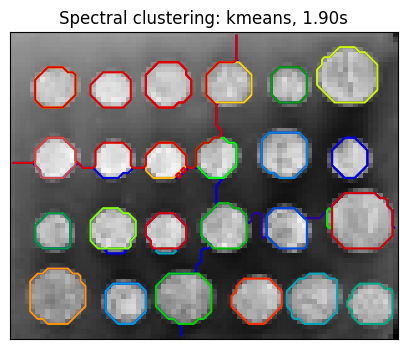

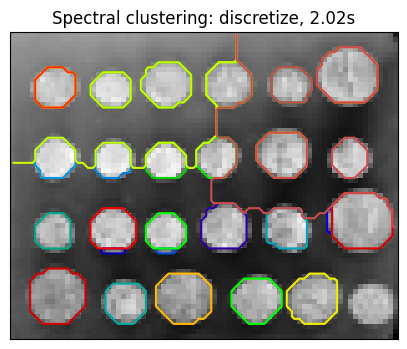

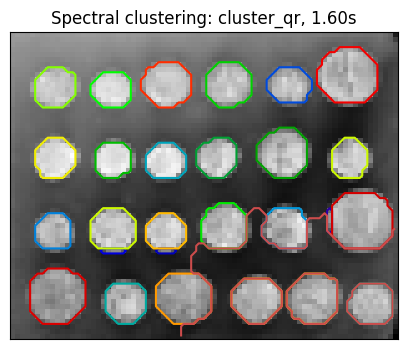

In [3]:
orig_coins = coins()
smoothened_coins = gaussian_filter(orig_coins, sigma=2)
rescaled_coins = rescale(smoothened_coins,
						 0.2,
						 mode="reflect",
						 anti_aliasing=False)
graph = image.img_to_graph(rescaled_coins)
beta, eps = 10, 1e-6
n_regions, n_regions_plus = 26, 3
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

for assign_labels in ("kmeans", "discretize", "cluster_qr"):
	t0 = time.time()
    labels = spectral_clustering(
        graph,
        n_clusters=(n_regions + n_regions_plus),
        eigen_tol=1e-7,
        assign_labels=assign_labels,
        random_state=42,
    )

    t1 = time.time()
    labels = labels.reshape(rescaled_coins.shape)
    plt.figure(figsize=(5, 5))
    plt.imshow(rescaled_coins, cmap=plt.cm.gray)

    plt.xticks(())
    plt.yticks(())
    title = "Spectral clustering: %s, %.2fs" % (assign_labels, (t1 - t0))
    print(title)
    plt.title(title)
    for l in range(n_regions):
        colors = [plt.cm.nipy_spectral((l + 4) / float(n_regions + 4))]
        plt.contour(labels == l, colors=colors)
        # To view individual segments as appear comment in plt.pause(0.5)
plt.show()

## Synthetic make_blobs

/home/eugene/.local/share/mise/installs/python/3.13.1/lib/python3.13/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


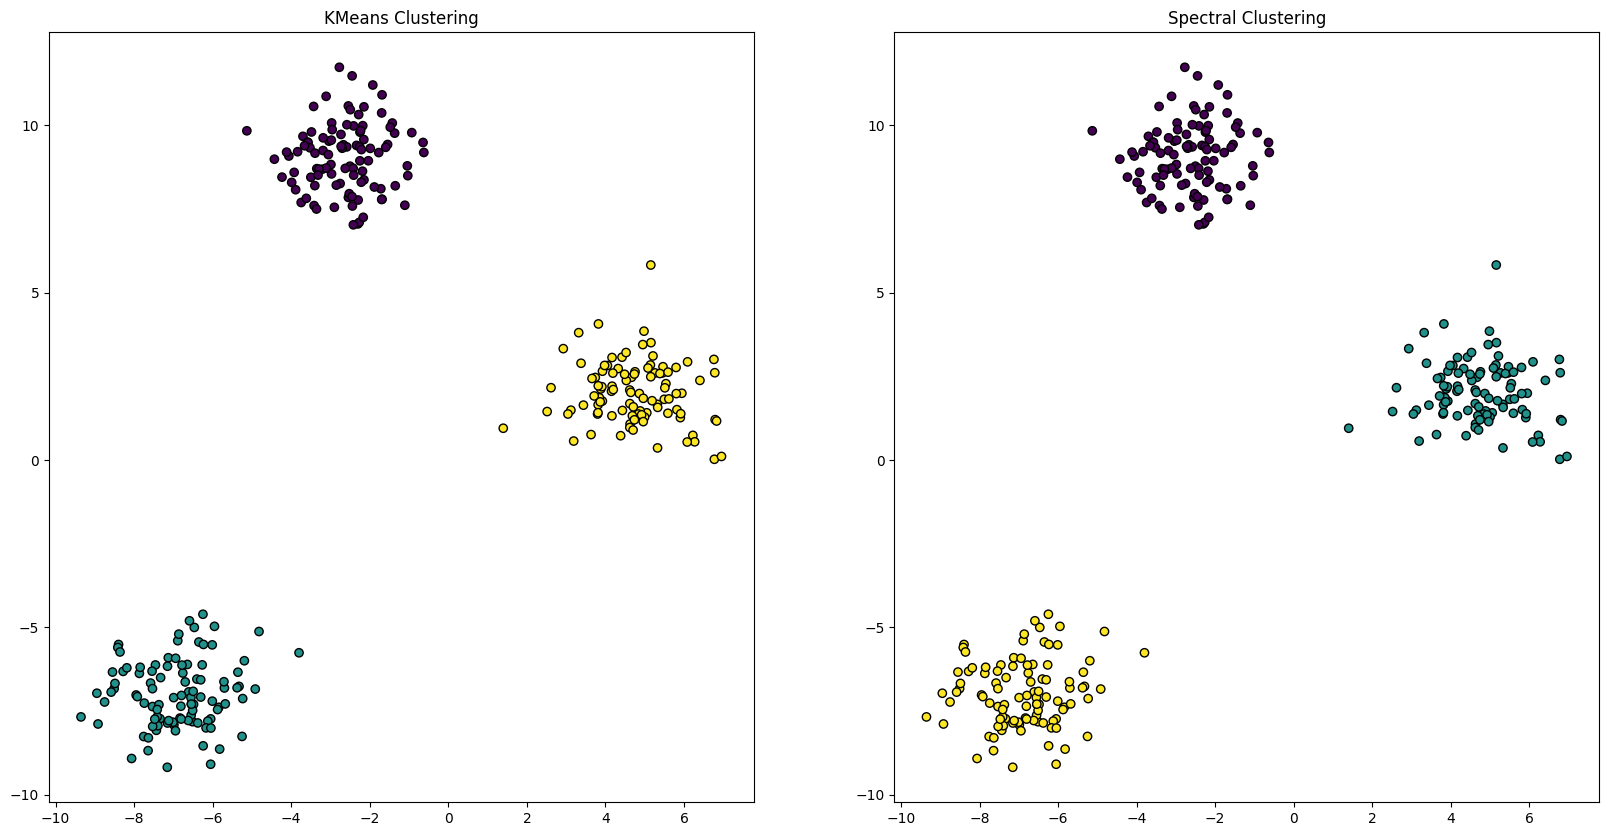

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, SpectralClustering

X, _ = make_blobs(n_samples=300, n_features=2, centers=3, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(X)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k')
axes[0].set_title("KMeans Clustering")
axes[1].scatter(X[:, 0], X[:, 1], c=spectral_labels, cmap='viridis', edgecolors='k')
axes[1].set_title("Spectral Clustering")
plt.show()
